In [1]:
# Loading te data #
## 1. and 2. Load as pandas DataFrame and visualise
import pandas as pd
data = pd.read_csv("heart_failure.csv")

In [2]:
### See all columns and their types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                299 non-null    int64  
 1   age                       299 non-null    float64
 2   anaemia                   299 non-null    object 
 3   creatinine_phosphokinase  299 non-null    int64  
 4   diabetes                  299 non-null    object 
 5   ejection_fraction         299 non-null    int64  
 6   high_blood_pressure       299 non-null    object 
 7   platelets                 299 non-null    float64
 8   serum_creatinine          299 non-null    float64
 9   serum_sodium              299 non-null    int64  
 10  sex                       299 non-null    object 
 11  smoking                   299 non-null    object 
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
 14  death_even

In [3]:
### See the statistical data of each column
data.describe()

,Unnamed: 0,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000
mean,149.000000,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870,0.32107
std,86.458082,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208,0.46767
min,0.000000,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000,0.00000
25%,74.500000,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000,0.00000
50%,149.000000,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000,0.00000
75%,223.500000,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000,1.00000
max,298.000000,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000,1.00000


In [4]:
### See a snippet of data
data.head(5)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,death_event
0,0,75.0,no,582,no,20,yes,265000.00,1.9,130,yes,no,4,1,yes
1,1,55.0,no,7861,no,38,no,263358.03,1.1,136,yes,no,6,1,yes
2,2,65.0,no,146,no,20,no,162000.00,1.3,129,yes,yes,7,1,yes
3,3,50.0,yes,111,no,20,no,210000.00,1.9,137,yes,no,7,1,yes
4,4,65.0,yes,160,yes,20,no,327000.00,2.7,116,no,no,8,1,yes


In [5]:
## 3. Print ditribution of death_event
from collections import Counter
counter_death_event = Counter(data["death_event"])
print('Classes and number of values in the dataset: ', counter_death_event)

Classes and number of values in the dataset:  Counter({'no': 203, 'yes': 96})


In [6]:
## 4. Assign label
y = data.pop("death_event")
y.head(5)

0    yes
1    yes
2    yes
3    yes
4    yes
Name: death_event, dtype: object

In [7]:
## 5. Extract useful features
X = data.loc[:, ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
X.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,no,582,no,20,yes,265000.00,1.9,130,yes,no,4
1,55.0,no,7861,no,38,no,263358.03,1.1,136,yes,no,6
2,65.0,no,146,no,20,no,162000.00,1.3,129,yes,yes,7
3,50.0,yes,111,no,20,no,210000.00,1.9,137,yes,no,7
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,no,no,8


In [8]:
# Data Preprocessing
## 6. One-hot encoding for categorical features
cat_cols = X.select_dtypes(include = 'object').columns.tolist()
print(cat_cols)

X = pd.get_dummies(X, columns = cat_cols)
print(X.columns.tolist())

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'anaemia_no', 'anaemia_yes', 'diabetes_no', 'diabetes_yes', 'high_blood_pressure_no', 'high_blood_pressure_yes', 'sex_no', 'sex_yes', 'smoking_no', 'smoking_yes']


In [9]:
## 7. Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = 0.20, train_size = 0.80, random_state = 42
  )

In [10]:
### Apply SMOTE as the data is imbalanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Use y_train before one-hot encoding
X_train, y_train_res = smote.fit_resample(X_train, y_train)

print("New class distribution after SMOTE:", Counter(y_train_res))

New class distribution after SMOTE: Counter({'yes': 168, 'no': 168})


In [11]:
## 8. and 9. Scale the numeric features for normalisation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

### get numeric column names
numeric_cols = X.select_dtypes(include = ["int64", "float64"]).columns.tolist()

### define the tranformer (necessary for ColumnTransformer)
transformer = [("My_Standard_Scaler",  StandardScaler(), numeric_cols)]

### set the column transformer settings
my_ct = ColumnTransformer(transformer, remainder='passthrough', verbose=False) 

### fit the scaler and transform data
X_train_scaled = my_ct.fit_transform(X_train)
X_test_scaled = my_ct.transform(X_test)

In [12]:
### Visualise the normalised data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns.tolist())
X_train_scaled_df.head(5)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia_no,anaemia_yes,diabetes_no,diabetes_yes,high_blood_pressure_no,high_blood_pressure_yes,sex_no,sex_yes,smoking_no,smoking_yes
0,1.061119,-0.368228,-1.877322,-1.317313,-0.306289,0.235923,-1.338855,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.061119,-0.517738,0.117720,-0.313877,0.953628,-0.465582,0.619727,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.156530,-0.512653,-0.576208,1.393000,-0.015539,0.002088,0.735695,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,-0.892829,-0.484174,-0.576208,-0.375945,-0.790872,0.002088,-0.024544,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,2.675250,-0.026489,0.117720,0.093271,0.304286,-0.465582,-1.119803,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [13]:
# Prepare labels for classification #
## 11. Initialise label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print("un-processed labels: \n", y_train[0:4])

## 12. and 13. Fit the encoder and transform labels
y_train = le.fit_transform(y_train_res)
y_test = le.transform(y_test)

## 14. and 15. Convert encoded labels into binary vector
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("label-encoded, categorical labels: \n", y_train[0:4])

un-processed labels: 
 6      yes
183    yes
185    yes
146     no
Name: death_event, dtype: object
label-encoded, categorical labels: 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [14]:
# Design the model
## 16. Initialise a sequential model
from tensorflow.keras.models import Sequential
my_model = Sequential()

## 17. Create and add the input layer to the model
from tensorflow.keras.layers import InputLayer
my_model.add(
  InputLayer(
    shape=(X_train_scaled.shape[1], ),
    name="Input_Layer",   
  )
)

## 18. Create and add the hidden dense layer(s) to the model
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

my_model.add(
  Dense(
    units = 16,
    activation = 'relu',    
    use_bias = True,
    kernel_regularizer = regularizers.L1L2(0.01),
    name = "Hidden_Layer1"
  )
)

## 19. Create and add the output layer to the model
my_model.add(
  Dense(
    units = len(y_train[1]),
    activation = 'softmax',    
    use_bias = True,
    kernel_regularizer = regularizers.L1L2(0.001),
    name = "Output_Layer"
  )
)

## Visualise the model
print(my_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer1 (Dense)           │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322 (1.26 KB)

 Trainable params: 322 (1.26 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
## 20. Compile the model
### Create Optimizer
from tensorflow.keras.optimizers import Adam
my_optimizer = Adam(learning_rate=0.001)

### Define Loss
from tensorflow.keras.losses import CategoricalCrossentropy
my_loss = CategoricalCrossentropy()

### Compile
from tensorflow.keras.metrics import AUC, Precision, Recall

my_model.compile(
    optimizer = my_optimizer,
    loss = my_loss,
    metrics = [
        'categorical_accuracy',
        AUC(name='auc'),
        Precision(name='precision'),
        Recall(name='recall')
    ]
)

In [16]:
# Train and ealuate model # 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

## 21. Train the model
history = my_model.fit(
              x=X_train_scaled,
              y=y_train,
              batch_size=2,
              epochs=100,
              verbose=1,
              callbacks=[early_stop], # can add layter on
              validation_data=(X_test_scaled, y_test),
              shuffle=True
              )

Epoch 1/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - auc: 0.5671 - categorical_accuracy: 0.5206 - loss: 1.3255 - precision: 0.5206 - recall: 0.5206 - val_auc: 0.6886 - val_categorical_accuracy: 0.6167 - val_loss: 1.1621 - val_precision: 0.6167 - val_recall: 0.6167
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8452 - categorical_accuracy: 0.7631 - loss: 1.0126 - precision: 0.7631 - recall: 0.7631 - val_auc: 0.7872 - val_categorical_accuracy: 0.6667 - val_loss: 0.9974 - val_precision: 0.6667 - val_recall: 0.6667
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8940 - categorical_accuracy: 0.7865 - loss: 0.8741 - precision: 0.7865 - recall: 0.7865 - val_auc: 0.8308 - val_categorical_accuracy: 0.7333 - val_loss: 0.9078 - val_precision: 0.7333 - val_recall: 0.7333
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9226 - categorical_accuracy: 0.8807 - loss: 0.7670 - precision: 0.8807 - recall: 0.8807 - val_auc: 0.8363 - val_categorical_accuracy: 0.7

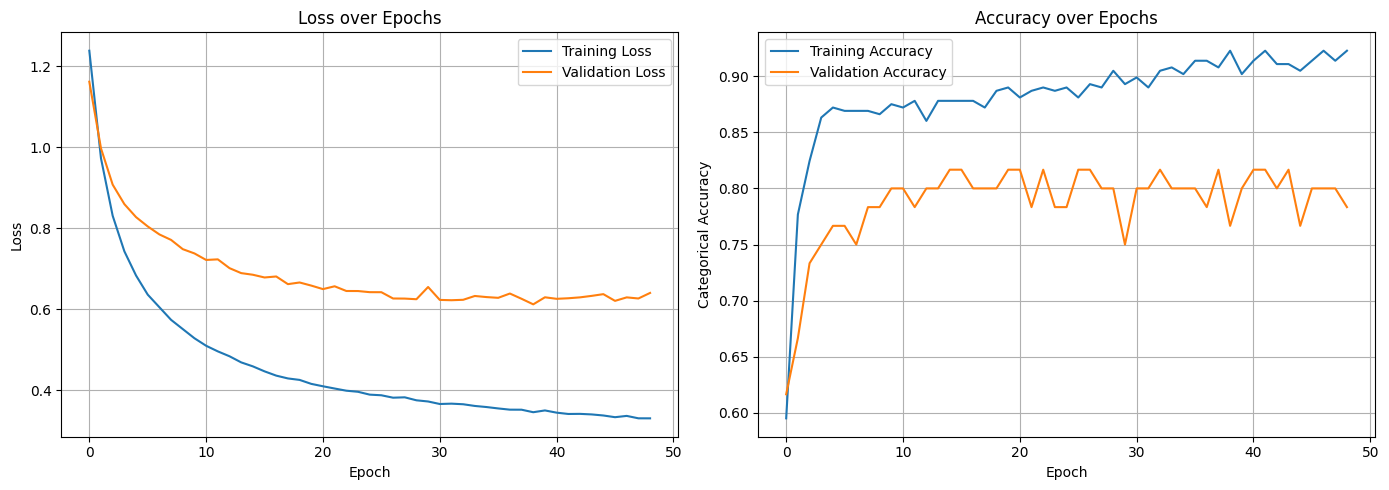

In [17]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss over Epochs')
axs[0].legend()
axs[0].grid(True)

# Plot Categorical Accuracy
axs[1].plot(history.history['categorical_accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Categorical Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [18]:
## 22. Evaluate the model
loss, acc, auc, prec, recall = my_model.evaluate(
                    x=X_test_scaled,
                    y=y_test,
                    batch_size=2,
                    verbose=0
                    )
print(f"Loss = {loss:.4f}")
print(f"Accuracy = {acc*100:.2f}%")
print(f"AUC = {auc:.4f}, Precision = {prec:.4f}, Recall = {recall:.4f}")

Loss = 0.6122
Accuracy = 76.67%
AUC = 0.8582, Precision = 0.7667, Recall = 0.7667


In [19]:
# Generate Classification report
## 23. Predictions
y_estimate = my_model.predict(x = X_test_scaled)

## 24. - 26. Print classification report
import numpy as np
from sklearn.metrics import classification_report

y_estimate = np.argmax(y_estimate, axis = 1)
y_true = np.argmax(y_test, axis = 1)

print(classification_report(y_true, y_estimate))
print("Note: Class 0 -> Survival, Class 1 -> Death")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.74      0.68      0.71        25

    accuracy                           0.77        60
   macro avg       0.76      0.75      0.76        60
weighted avg       0.77      0.77      0.77        60

Note: Class 0 -> Survival, Class 1 -> Death


Interpretation of each metric:
Precision for Class 0 (Survival):
Out of all instances predicted as survival, 76% were actually survival.

Recall for Class 0:
The model correctly identified 89% of all survival cases (high recall means few false negatives for survival).

Precision for Class 1 (Death):
Out of all instances predicted as death, 79% were actually death.

Recall for Class 1:
The model correctly identified 60% of all death cases (moderate recall means it missed 40% of deaths).

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


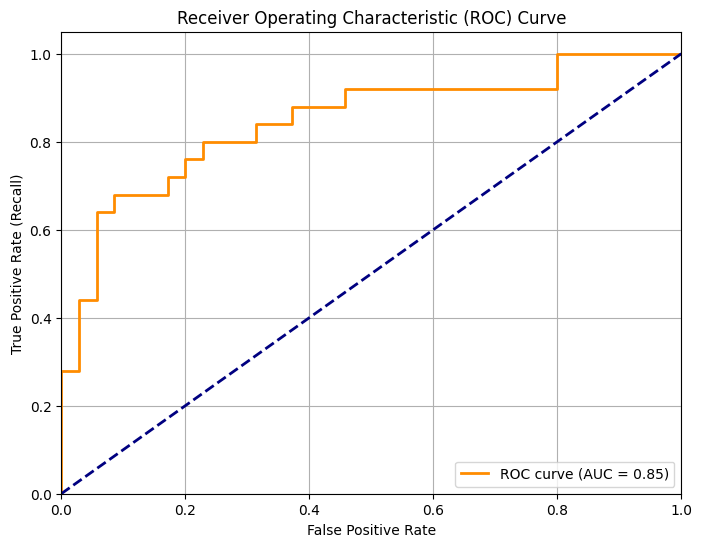

In [20]:
## ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming y_test and y_estimate are already defined as one-hot and probabilities respectively:

# If y_test is one-hot encoded, get the true labels for positive class (e.g. class 1)
y_true = y_test[:, 1]

# Get predicted probabilities for positive class from your model
y_scores = my_model.predict(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()